In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [17]:
cities = ['Berlin', 'Frankfurt', 'Hamburg', 
          'Nuremberg', 'Munich', 'Stuttgart',
          'Hanover', 'Saarbruecken', 'Cologne',
          'Constance', 'Freiburg', 'Karlsruhe',
'Afghanistan',
'Albania',
'Algeria',
'Andorra',
'Angola',
'Antigua','Barbuda',
'Argentina',
'Armenia',
'Australia',
'Austria',
'Azerbaijan',
'Belarus',
'Belgium',
'Belize',
'Cabo Verde',
'Cambodia',
'Denmark',
'East Timor',
'Ecuador',
'Egypt',
'Djibouti',

          
'Fiji',
'Finland',
'France',
'Gabon',
'The Gambia',
'Georgia',
          
'Haiti',
'Honduras',
'Hungary',
'Iceland',
'India',
'Indonesia',
          
'Jamaica',
'Japan',
'Jordan',

'Kazakhstan',
'Kenya',
'Kiribati',
          
'Laos',
'Latvia',
          
'Madagascar',
'Malawi',

'Namibia',
'Nauru',

'Oman',

'Pakistan',
'Palau',
          
'Qatar',

'Romania',
'Russia',

'Saint Kitts',
'Saint Lucia',

'Taiwan',
'Tajikistan',

'Uganda',
'Ukraine',

'Vanuatu',
'Vatican City',
'Yemen',
'Zambia',
'Zimbabwe'
         ]

n= len(cities)
data = {'Temperature': np.random.normal(24, 3, n),
        'Humidity': np.random.normal(78, 2.5, n),
        'Wind': np.random.normal(15, 4, n),
        'cluster': np.random.randint(0,3, n)
       }
df = pd.DataFrame(data=data, index=cities)
df  

,Temperature,Humidity,Wind,cluster
Berlin,26.014143,79.525289,17.270257,0
Frankfurt,19.869591,78.697948,13.659230,2
Hamburg,27.025321,77.717830,11.280297,2
Nuremberg,24.524554,74.887630,12.296380,2
Munich,21.245391,78.852544,16.454123,0
...,...,...,...,...
Vanuatu,22.882068,76.836278,10.915252,2
Vatican City,24.106324,76.593597,19.241991,2
Yemen,24.894281,82.967328,12.891512,2
Zambia,22.321783,76.902051,12.295980,0


In [18]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['Temperature'].mean())
    result_list.append(df.loc[df['cluster'] == i]['Wind'].mean())
    centroids[i] = result_list
centroids

{0: [23.919359332267693, 14.982875424677843],
 1: [24.086057053471023, 15.070196106608574],
 2: [24.62215101363469, 14.751323254177485]}

Text(0, 0.5, 'Wind')

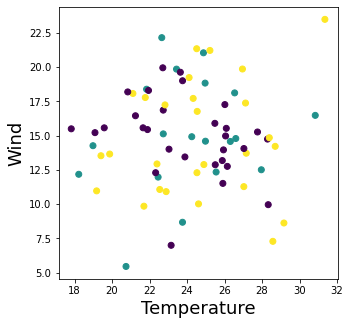

In [19]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Temperature'], df['Wind'], c=df.cluster)
plt.xlabel('Temperature', fontsize=18)
plt.ylabel('Wind', fontsize=18)

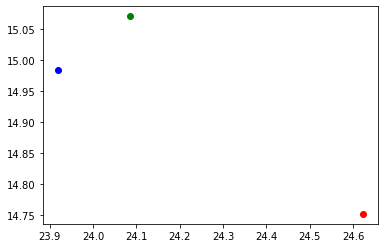

In [20]:
colmap = {0: 'b', 1: 'g', 2: 'r'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.show()

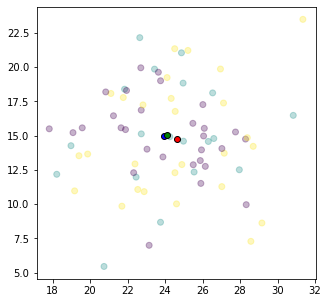

In [21]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Temperature'], df['Wind'], c=df.cluster,alpha = 0.3)
colmap = {0: 'b', 1: 'g', 2: 'r'}
col = [0,1]
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i], edgecolor='k')
plt.show()

In [22]:
def assignment(df, centroids):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['Temperature'] - centroids[i][0]) ** 2
                + (df['Wind'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [23]:
df = assignment(df, centroids)
df

,Temperature,Humidity,Wind,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
Berlin,26.014143,79.525289,17.270257,0,3.101650,2.925369,2.877963,2,r
Frankfurt,19.869591,78.697948,13.659230,2,4.260594,4.446281,4.876422,0,b
Hamburg,27.025321,77.717830,11.280297,2,4.832813,4.796103,4.221759,2,r
Nuremberg,24.524554,74.887630,12.296380,2,2.753819,2.808262,2.456883,2,r
Munich,21.245391,78.852544,16.454123,0,3.051996,3.159848,3.781804,0,b
...,...,...,...,...,...,...,...,...,...
Vanuatu,22.882068,76.836278,10.915252,2,4.197801,4.325869,4.212283,0,b
Vatican City,24.106324,76.593597,19.241991,2,4.263217,4.171844,4.520196,1,g
Yemen,24.894281,82.967328,12.891512,2,2.307439,2.323767,1.879615,2,r
Zambia,22.321783,76.902051,12.295980,0,3.125965,3.287695,3.364581,0,b


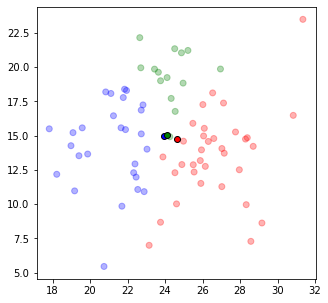

In [24]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Temperature'], df['Wind'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

In [25]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['Temperature'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['Wind'])
    return k

In [26]:
centroids = update(centroids)
centroids

{0: [21.138762854054775, 14.329180546015907],
 1: [24.27946301928208, 19.399972413438864],
 2: [26.63045596148297, 13.548098608042318]}

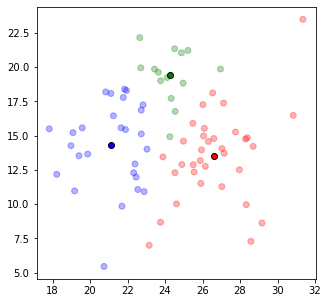

In [27]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Temperature'], df['Wind'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

In [28]:
df = assignment(df, centroids)

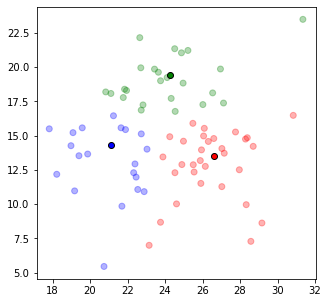

In [29]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Temperature'], df['Wind'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.show()

In [30]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

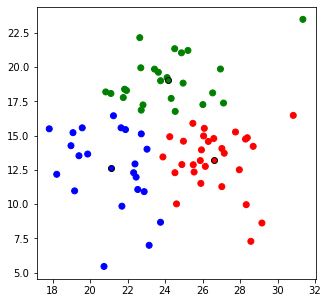

In [31]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Temperature'], df['Wind'], color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')

plt.show()